# Part 1: Working with Regex

In [1]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

In [2]:
#Try to find the right Regex to extract the phone number in this string:
pattern = r"\d{10}"
text_to_search = "Hello my name is sebastien, you can call me on 0664533519. See you!"
re.findall(pattern, text_to_search)


['0664533519']

In [33]:
#Try to find the right Regex to extract the ZIP code in this string:
zip_code_pattern = r"\d{5}"
text_to_search = "I moved to Paris 75011, it's closer to my workplace."
re.findall(zip_code_pattern, text_to_search)

['75011']

In [34]:
# TEST THIS IN YOUR NOTEBOOK
pattern = r"date of"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [55]:
# TEST THIS IN YOUR NOTEBOOK
date_pattern = r"\d{4}/\d{2}/\d{2}"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(date_pattern, text_to_search)

['2019/03/12', '2021/03/01']

In [57]:
# Find the Regex that matches the date in this string from the receipt:
# "Receipt Number 103402 ||| 15-02-2017"
date_pattern = r"\d{2}-\d{2}-\d{4}"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(date_pattern, text_to_search)

['15-02-2017']

In [58]:
# Now let’s try to match the “Quantity” line in a receipt.
#r"Quantity +\d+"
quantity_pattern = r"Quantity +\d{3}"
text_to_search = "Quantity                         193"
re.findall(quantity_pattern, text_to_search)

['Quantity                         193']

In [76]:
# find the pattern that matches the full “Total Amount” line.
amount_pattern = r"Total Amount +\d+\.\d{2} €" 
text_to_search = "Total Amount               1850.00 €"
re.findall(amount_pattern, text_to_search)

['Total Amount               1850.00 €']

In [77]:
# extract only the numerical value
# TEST THIS IN YOUR NOTEBOOK
pattern = r"Receipt Number (\d+)"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern, text_to_search)

['103402']

In [78]:
# Find the right grouping to get only the “Quantity” value
quantity_group_pattern = r"Quantity +(\d+)"
text_to_search = "Quantity                         193"
re.findall(quantity_group_pattern, text_to_search)

['193']

In [87]:
# to get only the “Total Amount” value
amount_group_pattern = r"Total Amount +(\d+\.\d{2}) €" 
text_to_search = "Total Amount               1850.00 €"
re.findall(amount_group_pattern, text_to_search)

['1850.00']

In [88]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/02-Data-Sourcing/data-text-extraction-with-regex/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 6 items

test_patterns.py::TestPatterns::test_amount_group_pattern PASSED         [ 16%]
test_patterns.py::TestPatterns::test_amount_pattern PASSED               [ 33%]
test_patterns.py::TestPatterns::test_date_pattern PASSED                 [ 50%]
test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED       [ 66%]
test_patterns.py::TestPatterns::test_quantity_pattern PASSED             [ 83%]
test_patterns.py::TestPatterns::test_zip_code_pattern PASSED             [100%]

============================== 6 passed in 0.02s ===============================


💯

# Part 2: From a text file to a DataFrame

In [89]:
# YOUR CODE HERE
filepath = "data/receipts.txt"
with open(filepath, encoding="utf-8") as f:
    receipts_str = f.read()

In [90]:
print(receipts_str[:500])




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €

************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €

************************************


Receipt Number 103086 ||| 23-01-2017 
-----


In [91]:
receipts_list = receipts_str.split("====================================")
print(len(receipts_list))
for receipt in receipts_list:
    print(receipt)

100



Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €



************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €



************************************


Receipt Number 103086 ||| 23-01-2017 
------------------------------------

Quantity                         156
Total Amount               2808.00 €



************************************


Receipt Number 103193 ||| 31-01-2017 
------------------------------------

Quantity                         182
Total Amount               4368.00 €



************************************


Receipt Number 103270 ||| 06-02-2017 
------------------------------------

Quantity                          97
Total Amount               1988.50 €



************************************


Receipt Number 103402 ||| 15-02-2

In [92]:
receipts_dict = {
    "date": [],
    "quantity": [],
    "amount": []
}

In [93]:
for receipt in receipts_list:
    receipts_dict["date"].append(re.findall(date_pattern, receipt)[0])
    receipts_dict["quantity"].append(re.findall(quantity_group_pattern, receipt)[0])
    receipts_dict["amount"].append(re.findall(amount_group_pattern, receipt)[0])
    
print(receipts_dict)

{'date': ['02-01-2017', '05-01-2017', '23-01-2017', '31-01-2017', '06-02-2017', '15-02-2017', '16-02-2017', '17-02-2017', '21-02-2017', '27-02-2017', '28-02-2017', '01-03-2017', '08-03-2017', '09-03-2017', '17-03-2017', '21-03-2017', '21-03-2017', '22-03-2017', '22-03-2017', '27-03-2017', '31-03-2017', '07-04-2017', '11-04-2017', '14-04-2017', '17-04-2017', '18-04-2017', '19-04-2017', '20-04-2017', '24-04-2017', '02-05-2017', '05-05-2017', '12-05-2017', '15-05-2017', '15-05-2017', '17-05-2017', '18-05-2017', '19-05-2017', '22-05-2017', '24-05-2017', '30-05-2017', '02-06-2017', '12-06-2017', '14-06-2017', '15-06-2017', '16-06-2017', '19-06-2017', '19-06-2017', '30-06-2017', '03-07-2017', '04-07-2017', '05-07-2017', '05-07-2017', '07-07-2017', '11-07-2017', '11-07-2017', '13-07-2017', '13-07-2017', '19-07-2017', '20-07-2017', '21-07-2017', '24-07-2017', '25-07-2017', '25-07-2017', '25-07-2017', '25-07-2017', '27-07-2017', '31-07-2017', '01-08-2017', '04-08-2017', '07-08-2017', '08-08-201

In [94]:
receipts_df = pd.DataFrame.from_dict(receipts_dict)
receipts_df.head()

,date,quantity,amount
0,02-01-2017,163,3097.00
1,05-01-2017,110,935.00
2,23-01-2017,156,2808.00
3,31-01-2017,182,4368.00
4,06-02-2017,97,1988.50


In [95]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/02-Data-Toolkit/02-Data-Sourcing/data-text-extraction-with-regex/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_receipts.py::TestReceipts::test_receipt PASSED                      [ 25%]
test_receipts.py::TestReceipts::test_receipts_df_size PASSED             [ 50%]
test_receipts.py::TestReceipts::test_receipts_dict PASSED                [ 75%]
test_receipts.py::TestReceipts::test_receipts_list PASSED                [100%]

============================== 4 passed in 0.56s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master



# Part 3: Data Visualization

In [96]:
# YOUR CODE HERE
receipts_df['date'] = pd.to_datetime(receipts_df['date'], format="%d-%m-%Y")

In [97]:
receipts_df.sort_values('date', inplace=True)

In [98]:
receipts_df.head(10)

,date,quantity,amount
0,2017-01-02,163,3097.00
1,2017-01-05,110,935.00
2,2017-01-23,156,2808.00
3,2017-01-31,182,4368.00
4,2017-02-06,97,1988.50
5,2017-02-15,163,3586.00
6,2017-02-16,223,5017.50
7,2017-02-17,104,2756.00
8,2017-02-21,153,3060.00
9,2017-02-27,158,2686.00


In [99]:
receipts_df.set_index('date', inplace=True)

In [100]:
receipts_df.head(10)

,quantity,amount
date,,
2017-01-02,163,3097.00
2017-01-05,110,935.00
2017-01-23,156,2808.00
2017-01-31,182,4368.00
2017-02-06,97,1988.50
2017-02-15,163,3586.00
2017-02-16,223,5017.50
2017-02-17,104,2756.00
2017-02-21,153,3060.00


In [101]:
receipts_df["quantity"] = pd.to_numeric(receipts_df["quantity"])
receipts_df["amount"] = pd.to_numeric(receipts_df["amount"])

In [102]:
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-01-02 to 2017-12-15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  100 non-null    int64  
 1   amount    100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


<AxesSubplot:xlabel='date'>

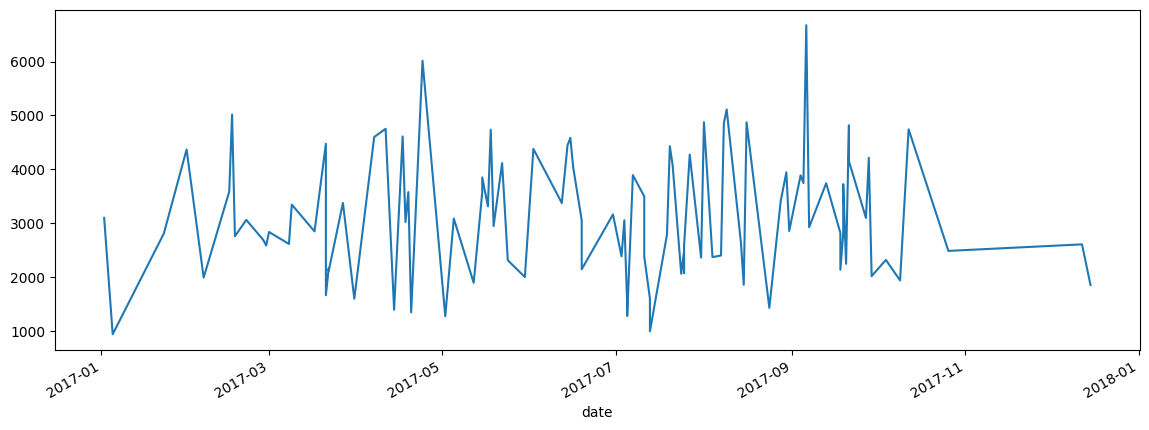

In [103]:
receipts_df['amount'].plot(figsize=(14,5))